# Language Detection Project

## 1-Importing data that we scrapped from twitter

In [96]:
import pandas as pd
pd.options.mode.chained_assignment = None  
df = pd.read_csv('language_detection_data_s.csv',index_col=None)
df

,Text,Language
0,\n@ZoltanTV\n @TwitterFrance\n et \n@Police...,French
1,@TwitterFrance\n c8,French
2,\n@SanaRyuk\n @alirabeh\n et 3 autres person...,French
3,\n@SoBusyDear\nIl faudrait inventer la possib...,French
4,\n@entreplume\n @PaulineLanglo15\n et \n@le...,French
...,...,...
13148,Marsh\n@DistortedKeys\n·\n2 avr. 2016En répons...,Darija
13149,Manal Amir (IA)\n@ManalManal93\n·\n27 mars 201...,Darija
13150,Manal Amir (IA)\n@ManalManal93\n·\n27 mars 201...,Darija
13151,Rania\n@ranaa_rania\n·\n25 mars 2016En réponse...,Darija


##  2-Exploring our dataset

In [97]:
df.shape

(13153, 2)

In [98]:
languages = set(df['Language'])
print('Languages', languages)


Languages {'Darija', 'English', 'French'}


In [99]:
#verifier si il y a les valeurs manquantes
df.isnull().sum()

Text        0
Language    0
dtype: int64

In [100]:
#count the number of texts available for each language
df['Language'].value_counts()

French     4530
Darija     4384
English    4239
Name: Language, dtype: int64

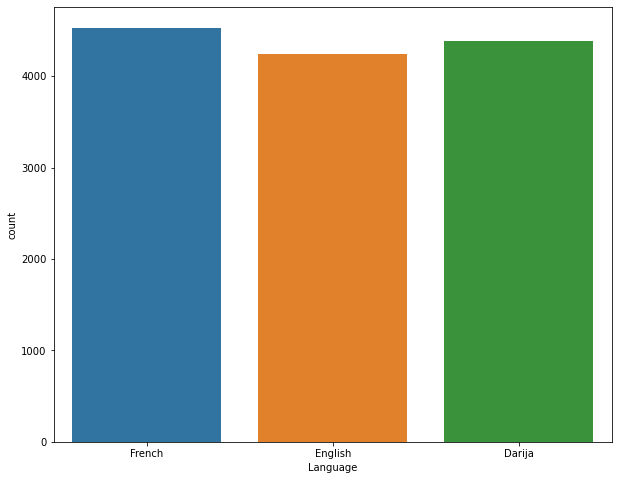

In [101]:
#Verify the distribution of data
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 8))
sns.countplot(x=df['Language'])
plt.show()

### NOTE:   

We see that our dataset is almost balanced

## 3- Data Pre-Processing

In [102]:
import neattext.functions as nfx
def Clean_Text(dataset,column):
    data=dataset
    data[column]=data[column].str.lower()
    data[column].replace(r'\s+|\\n', ' ', regex=True, inplace=True) 
    data[column]=data[column].apply(nfx.remove_userhandles)
    data[column]=data[column].apply(nfx.remove_urls)
    data[column]=data[column].apply(nfx.remove_punctuations)
    data[column]=data[column].apply(nfx.remove_special_characters)
    data[column]=data[column].apply(nfx.remove_emails)
    data[column]=data[column].apply(nfx.remove_multiple_spaces)
    data[column].replace(r'\d{1,2}\s(Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec|janv|juil|aot|janvier|février|mars|avril|mai|juin|juillet|août|septembre|octobre|novembre|décembre|January|February|March|April|May|June|July|August|September|October|November|December|avr|déc|févr|janv|juill|nov|oct|sept)\s\d{4}', ' ', regex=True, inplace=True) 
    data[column].replace("  ", " ", regex=True, inplace=True)
    data[column].replace(r'(autres personnes|en rponse|[a-z][0-9][0-9][a-z]+|[0-9][0-9]+|[0,1,4,6,8]+|[0,1,4,6,8]+|[a-z][0,1,4,6,8])', ' ', regex=True, inplace=True)
    data[column].replace("(janv|\dh| h | \d |\d | \d|a35crasherait| d24d1minfriendly| \d+ \d+| \d+\d+)", "", regex=True, inplace=True)


    return data

In [103]:
dataset=Clean_Text(df,'Text')
dataset

,Text,Language
0,et imagine ce que ressent cest vraiment des m...,French
1,,French
2,et compte cybercriminel depuis plusieurs ann...,French
3,il faudrait inventer la possibilit de dislike...,French
4,et en fait cest un troll de collard il critiq...,French
...,...,...
13148,marsh l3assir,Darija
13149,manal amir ia hhhhheti l3assir,Darija
13150,manal amir ia ah ma3rofin w mzyan wtana dok ...,Darija
13151,rania ouiitahom l3assir ms aykon b9a fih l7...,Darija


In [104]:
#Remove english and french stop words
import nltk
french_stopwords = set(nltk.corpus.stopwords.words('French'))
english_stopwords = set(nltk.corpus.stopwords.words('English'))
for k in range(len(dataset)):
    if dataset['Language'][k]=='French':
        dataset['Text'] = dataset['Text'].str.lower().apply(lambda x: ' '.join([word for word in str(x).split() if word not in french_stopwords]))
    if dataset['Language'][k]=='Enslish':
        dataset['Text'] = dataset['Text'].str.lower().apply(lambda x: ' '.join([word for word in str(x).split() if word not in french_stopwords]))


extract_keywords function was created In order to determine the manipulating voccabulary of each language

In [105]:
from collections import Counter
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_commen_tokens=Counter(tokens).most_common(num)
    return dict(most_commen_tokens)

1- Dominant voccabulary in Darija

In [106]:
#extraction of Darija keywords
language_list=dataset['Language'].unique().tolist()
Darija_list=dataset[dataset['Language']=='Darija']['Text'].tolist()
Darija_docx=' '.join(Darija_list)
keywords_Darija=extract_keywords(Darija_docx)
keywords_Darija

{'khoya': 1245,
 'l3assir': 782,
 'wa3r': 769,
 'a': 458,
 'dc': 442,
 'smi9li': 302,
 'hai': 252,
 'mrbou7a': 236,
 'f': 191,
 'to': 181,
 'o': 167,
 'w': 163,
 'the': 163,
 'li': 145,
 'had': 129,
 'ana': 115,
 'i': 115,
 'ki': 100,
 'cest': 100,
 'dial': 98,
 'and': 92,
 'is': 89,
 'rah': 80,
 'of': 79,
 'chi': 76,
 'you': 76,
 'mn': 74,
 'ko': 74,
 'in': 72,
 'ya': 72,
 'bhi': 68,
 'nahi': 66,
 'fvr': 65,
 'ghir': 64,
 'b': 64,
 'allah': 61,
 'kan': 60,
 'mein': 60,
 'for': 59,
 'nta': 58,
 'wa': 58,
 'el': 58,
 'm3a': 56,
 'merci': 56,
 'ka': 54,
 'kya': 53,
 'jai': 52,
 'ra': 51,
 'it': 50,
 'k': 50}

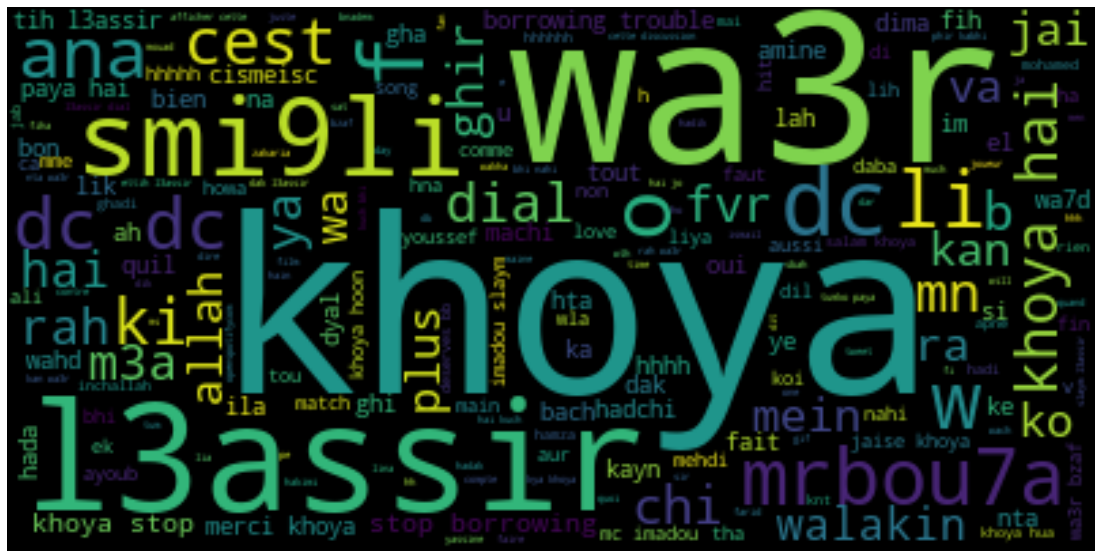

In [107]:
#Word Cloud
from wordcloud import WordCloud
def plot_wordcloud(docx):
    mywordcloud=WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
plot_wordcloud(Darija_docx) 

To perform a deeper data cleanning, we tokenize our text into a set of separated words

In [108]:
import nltk
dataset['tokenized_sents'] = dataset.apply(lambda row: nltk.word_tokenize(row['Text']), axis=1)
dataset

,Text,Language,tokenized_sents
0,imagine ressent cest vraiment malades mentaux ...,French,"[imagine, ressent, cest, vraiment, malades, me..."
1,,French,[]
2,compte cybercriminel depuis plusieurs annes ra...,French,"[compte, cybercriminel, depuis, plusieurs, ann..."
3,faudrait inventer possibilit disliker tweet oc...,French,"[faudrait, inventer, possibilit, disliker, twe..."
4,fait cest troll collard critique zemmour disan...,French,"[fait, cest, troll, collard, critique, zemmour..."
...,...,...,...
13148,marsh l3assir,Darija,"[marsh, l3assir]"
13149,manal amir ia hhhhheti l3assir,Darija,"[manal, amir, ia, hhhhheti, l3assir]"
13150,manal amir ia ah ma3rofin w mzyan wtana dok m3...,Darija,"[manal, amir, ia, ah, ma3rofin, w, mzyan, wtan..."
13151,rania ouiitahom l3assir ms aykon b9a fih l7al ...,Darija,"[rania, ouiitahom, l3assir, ms, aykon, b9a, fi..."


In [109]:
def cleaner(dataset):
    for sentence in dataset.tokenized_sents:
        for token in sentence:
            if len(token) < 3  :
                sentence.remove(token)
    return dataset

In [110]:
df.isnull().sum()

Text               0
Language           0
tokenized_sents    0
dtype: int64

In [111]:
dataset=cleaner(dataset)
dataset

,Text,Language,tokenized_sents
0,imagine ressent cest vraiment malades mentaux ...,French,"[imagine, ressent, cest, vraiment, malades, me..."
1,,French,[]
2,compte cybercriminel depuis plusieurs annes ra...,French,"[compte, cybercriminel, depuis, plusieurs, ann..."
3,faudrait inventer possibilit disliker tweet oc...,French,"[faudrait, inventer, possibilit, disliker, twe..."
4,fait cest troll collard critique zemmour disan...,French,"[fait, cest, troll, collard, critique, zemmour..."
...,...,...,...
13148,marsh l3assir,Darija,"[marsh, l3assir]"
13149,manal amir ia hhhhheti l3assir,Darija,"[manal, amir, hhhhheti, l3assir]"
13150,manal amir ia ah ma3rofin w mzyan wtana dok m3...,Darija,"[manal, amir, ah, ma3rofin, mzyan, wtana, dok,..."
13151,rania ouiitahom l3assir ms aykon b9a fih l7al ...,Darija,"[rania, ouiitahom, l3assir, aykon, b9a, fih, l..."


In [112]:
#After successfully removing noise from our tokenze we detokenize the sentences
from nltk.tokenize.treebank import TreebankWordDetokenizer
dataset['detokenized_sents'] = dataset.apply(lambda row: TreebankWordDetokenizer().detokenize(row['tokenized_sents']), axis=1)
dataset

,Text,Language,tokenized_sents,detokenized_sents
0,imagine ressent cest vraiment malades mentaux ...,French,"[imagine, ressent, cest, vraiment, malades, me...",imagine ressent cest vraiment malades mentaux ...
1,,French,[],
2,compte cybercriminel depuis plusieurs annes ra...,French,"[compte, cybercriminel, depuis, plusieurs, ann...",compte cybercriminel depuis plusieurs annes ra...
3,faudrait inventer possibilit disliker tweet oc...,French,"[faudrait, inventer, possibilit, disliker, twe...",faudrait inventer possibilit disliker tweet oc...
4,fait cest troll collard critique zemmour disan...,French,"[fait, cest, troll, collard, critique, zemmour...",fait cest troll collard critique zemmour disan...
...,...,...,...,...
13148,marsh l3assir,Darija,"[marsh, l3assir]",marsh l3assir
13149,manal amir ia hhhhheti l3assir,Darija,"[manal, amir, hhhhheti, l3assir]",manal amir hhhhheti l3assir
13150,manal amir ia ah ma3rofin w mzyan wtana dok m3...,Darija,"[manal, amir, ah, ma3rofin, mzyan, wtana, dok,...",manal amir ah ma3rofin mzyan wtana dok m3rofin...
13151,rania ouiitahom l3assir ms aykon b9a fih l7al ...,Darija,"[rania, ouiitahom, l3assir, aykon, b9a, fih, l...",rania ouiitahom l3assir aykon b9a fih l7al tfo...


In [113]:
dataset=dataset[dataset['detokenized_sents'].str.len()>=4]
dataset

,Text,Language,tokenized_sents,detokenized_sents
0,imagine ressent cest vraiment malades mentaux ...,French,"[imagine, ressent, cest, vraiment, malades, me...",imagine ressent cest vraiment malades mentaux ...
2,compte cybercriminel depuis plusieurs annes ra...,French,"[compte, cybercriminel, depuis, plusieurs, ann...",compte cybercriminel depuis plusieurs annes ra...
3,faudrait inventer possibilit disliker tweet oc...,French,"[faudrait, inventer, possibilit, disliker, twe...",faudrait inventer possibilit disliker tweet oc...
4,fait cest troll collard critique zemmour disan...,French,"[fait, cest, troll, collard, critique, zemmour...",fait cest troll collard critique zemmour disan...
5,cest trolling base fait gens ragissent faut si...,French,"[cest, trolling, base, fait, gens, ragissent, ...",cest trolling base fait gens ragissent faut si...
...,...,...,...,...
13148,marsh l3assir,Darija,"[marsh, l3assir]",marsh l3assir
13149,manal amir ia hhhhheti l3assir,Darija,"[manal, amir, hhhhheti, l3assir]",manal amir hhhhheti l3assir
13150,manal amir ia ah ma3rofin w mzyan wtana dok m3...,Darija,"[manal, amir, ah, ma3rofin, mzyan, wtana, dok,...",manal amir ah ma3rofin mzyan wtana dok m3rofin...
13151,rania ouiitahom l3assir ms aykon b9a fih l7al ...,Darija,"[rania, ouiitahom, l3assir, aykon, b9a, fih, l...",rania ouiitahom l3assir aykon b9a fih l7al tfo...


In [125]:
dataset[['detokenized_sents','Language']]

,detokenized_sents,Language
0,imagine ressent cest vraiment malades mentaux ...,French
2,compte cybercriminel depuis plusieurs annes ra...,French
3,faudrait inventer possibilit disliker tweet oc...,French
4,fait cest troll collard critique zemmour disan...,French
5,cest trolling base fait gens ragissent faut si...,French
...,...,...
13148,marsh l3assir,Darija
13149,manal amir hhhhheti l3assir,Darija
13150,manal amir ah ma3rofin mzyan wtana dok m3rofin...,Darija
13151,rania ouiitahom l3assir aykon b9a fih l7al tfo...,Darija


In [130]:
#We check again the voccabulary of each language the results this time are satisfying
#liste of Darija keywords
language_list=dataset['Language'].unique().tolist()
Darija_list=dataset[dataset['Language']=='Darija']['detokenized_sents'].tolist()
Darija_docx=' '.join(Darija_list)
keywords_Darija=extract_keywords(Darija_docx)
keywords_Darija

{'khoya': 1243,
 'l3assir': 781,
 'wa3r': 771,
 'smi9li': 279,
 'hai': 252,
 'mrbou7a': 233,
 'ana': 115,
 'cest': 100,
 'dial': 98,
 'rah': 80,
 'chi': 75,
 'bhi': 68,
 'nahi': 66,
 'ghir': 63,
 'allah': 61,
 'mein': 60,
 'kan': 59,
 'nta': 58,
 'merci': 57,
 'm3a': 55,
 'jai': 53,
 'kya': 53,
 'dyal': 48,
 'hada': 48,
 'dak': 47,
 'stop': 47,
 'plus': 46,
 'tha': 46,
 'bach': 44,
 'paya': 44,
 'main': 44,
 'walakin': 43,
 'borrowing': 43,
 'gha': 42,
 'kuch': 42,
 'match': 41,
 'machi': 41,
 'trouble': 39,
 'wahd': 37,
 'bien': 37,
 'inchallah': 36,
 'bzaf': 35,
 'mohamed': 35,
 'youssef': 34,
 'oui': 34,
 'lik': 34,
 'dima': 33,
 'lah': 33,
 'bon': 33,
 'tumko': 33}

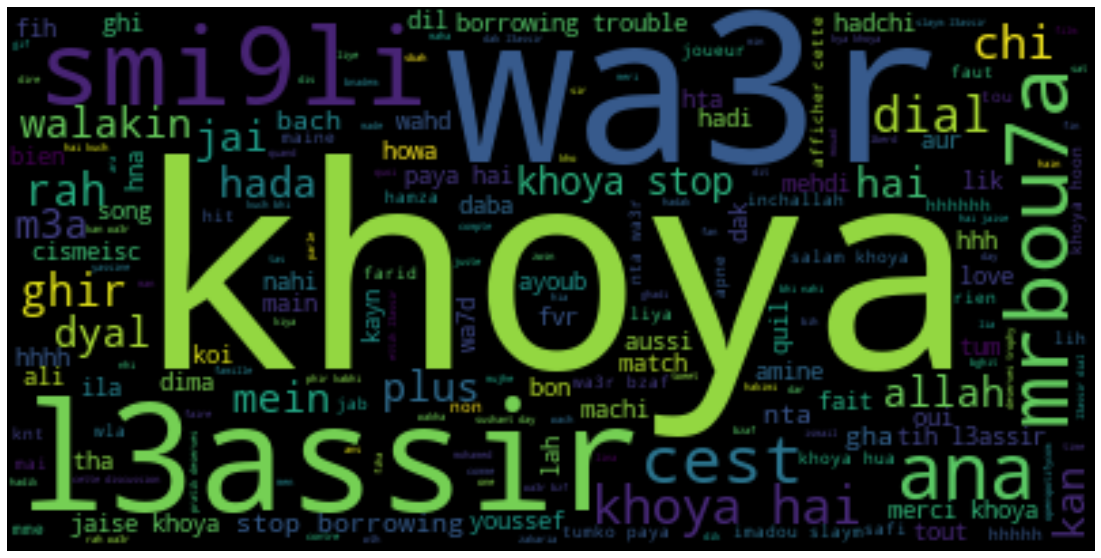

In [131]:
plot_wordcloud(Darija_docx) 

In [31]:
#liste of English keywords 
language_list=dataset['Language'].unique().tolist()
English_list=dataset[dataset['Language']=='English']['detokenized_sents'].tolist()
English_docx=' '.join(English_list)
keywords_English=extract_keywords(English_docx)
keywords_English

{'take': 482,
 'well': 464,
 'min': 459,
 'care': 450,
 'dont': 403,
 'like': 384,
 'eat': 341,
 'get': 275,
 'people': 265,
 'know': 220,
 'good': 199,
 'think': 183,
 'one': 183,
 'time': 169,
 'thats': 161,
 'want': 159,
 'make': 158,
 'even': 156,
 'really': 147,
 'need': 142,
 'would': 139,
 'got': 139,
 'love': 136,
 'cant': 132,
 'day': 132,
 'life': 131,
 'way': 129,
 'say': 125,
 'hit': 119,
 'going': 119,
 'still': 117,
 'feel': 114,
 'see': 114,
 'shit': 114,
 'right': 113,
 'always': 110,
 'back': 103,
 'said': 103,
 'much': 102,
 'never': 100,
 'best': 99,
 'youre': 96,
 'bad': 96,
 'lol': 95,
 'better': 94,
 'things': 93,
 'work': 90,
 'man': 89,
 'thing': 88,
 'done': 88}

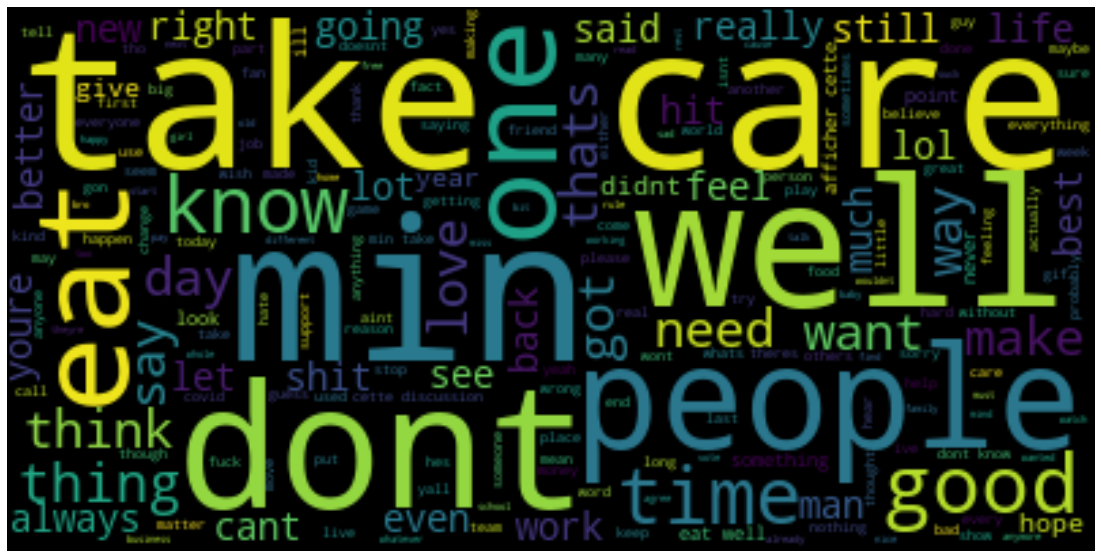

In [32]:
plot_wordcloud(English_docx) 

In [127]:
#Dataset partition (trainning & testing data)
import numpy as np
from sklearn.model_selection import train_test_split

X=dataset['detokenized_sents']
y=dataset['Language']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

9709
2428
9709
2428


In [128]:
X_train

2506     faut tourner vers eric zemmour car vraie quest...
31       bonjour cest parce soutien zemmour sponsorise ...
8299     wholesome hit start wit not caring and knowing...
5698     mia gotcha bit silly that people get worked ab...
4212     quil veuille tre remplaant direct quand choisi...
                               ...                        
12980    ayoub ilgui tssnaw l3assir an3tih lihom bel7aa...
5309     pradaaa minion even trip over shit more is wha...
5508     aussies barkley lillabet and hawklin dont thin...
929      allo quand modification pouvoir corriger lorsq...
7388            solodolorollo and is what aint mac mueller
Name: detokenized_sents, Length: 9709, dtype: object

To move on to the creation of machine learning models, we must first transform the text into a data matrix that corresponds to the processing by ML algorithms, while trying to minimizing the loss of information as much as possible.

# So how to perform a text transformation?

to do this, we work with the CountVectorizer, which is responsible for performing indexing, there are several parameters of countvectorizer, we propose in this case to work with N-gram in letters.

## Uni-Gram

In [129]:
# Extract Unigrams
from sklearn.feature_extraction.text import CountVectorizer
unigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,1))
X_unigram_train_raw = unigramVectorizer.fit_transform(X_train)
X_unigram_test_raw = unigramVectorizer.transform(X_test)


unigramFeatures = unigramVectorizer.get_feature_names()

print('Number of unigrams in training set:', len(unigramFeatures))

Number of unigrams in training set: 32


In [266]:
X_train[2506]

'faut tourner vers eric zemmour car vraie question cette lection celle survie france civilisation faut remettre lidentit peuple franais cur politique stanislas debatjeuneslci'

In [264]:
X_unigram_train_raw[0].toarray()

array([[22,  0,  0,  0,  0,  0, 11,  1,  9,  2, 23,  4,  0,  0, 16,  1,
         0,  9,  3,  9,  6,  3,  2, 13,  9, 15, 10,  4,  0,  0,  0,  1]],
      dtype=int64)

Our corpus is composed of 32 different features, represented in this list:

In [131]:
unigramFeatures

[' ',
 '2',
 '3',
 '5',
 '7',
 '9',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [190]:
#Distribution of uni-grams through the laguages
def train_lang_dict(X_raw_counts, y_train):
    lang_dict = {}
    for i in range(len(y_train)):
        lang = y_train[i]
        v = np.array(X_raw_counts[i])
        if not lang in lang_dict:
            lang_dict[lang] = v
        else:
            lang_dict[lang] += v
            
    # to relative
    for lang in lang_dict:
        v = lang_dict[lang]
        lang_dict[lang] = v / np.sum(v)
        
    return lang_dict

language_dict_unigram = train_lang_dict(X_unigram_train_raw.toarray(), y_train.values)

# Collect relevant chars per language
def getRelevantCharsPerLanguage(features, language_dict, significance=1e-5):
    relevantCharsPerLanguage = {}
    for lang in languages:
        chars = []
        relevantCharsPerLanguage[lang] = chars
        v = language_dict[lang]
        for i in range(len(v)):
            if v[i] > significance:
                chars.append(features[i])
    return relevantCharsPerLanguage



The 32 features are distributed among the languages as follows:

In [191]:
relevantCharsPerLanguage = getRelevantCharsPerLanguage(unigramFeatures, language_dict_unigram)
    
# Print number of unigrams per language
for lang in languages:    
    print(lang, len(relevantCharsPerLanguage[lang]))

Darija 32
English 32
French 32


In [193]:
relevantCharsPerLanguage

{'Darija': [' ',
  '2',
  '3',
  '5',
  '7',
  '9',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'],
 'English': [' ',
  '2',
  '3',
  '5',
  '7',
  '9',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z'],
 'French': [' ',
  '2',
  '3',
  '5',
  '7',
  '9',
  'a',
  'b',
  'c',
  'd',
  'e',
  'f',
  'g',
  'h',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'p',
  'q',
  'r',
  's',
  't',
  'u',
  'v',
  'w',
  'x',
  'y',
  'z']}

Note: in our case using uni-gram won't be usefull since all languages use almost the same letters

In [194]:
# number of bigrams
from sklearn.feature_extraction.text import CountVectorizer
bigramVectorizer = CountVectorizer(analyzer='char', ngram_range=(2,2))
X_bigram_raw = bigramVectorizer.fit_transform(X_train)
bigramFeatures = bigramVectorizer.get_feature_names()
print('Number of bigrams', len(bigramFeatures))

Number of bigrams 890


Bi-gram helped us to increase the number of features used in our corpus from 32 in uni-gram to 881 features listed bellow

To determine the significant combinations for each language, the notion of signiphicance is introduced as the minimum weight associated with the representative feature in a language in our case significance is equal to 0.01

In [195]:
bigramFeatures

[' 3',
 ' a',
 ' b',
 ' c',
 ' d',
 ' e',
 ' f',
 ' g',
 ' h',
 ' i',
 ' j',
 ' k',
 ' l',
 ' m',
 ' n',
 ' o',
 ' p',
 ' q',
 ' r',
 ' s',
 ' t',
 ' u',
 ' v',
 ' w',
 ' x',
 ' y',
 ' z',
 '2a',
 '2b',
 '2c',
 '2d',
 '2e',
 '2g',
 '2i',
 '2l',
 '2m',
 '2r',
 '2u',
 '2y',
 '3a',
 '3b',
 '3c',
 '3d',
 '3e',
 '3f',
 '3i',
 '3j',
 '3k',
 '3l',
 '3m',
 '3n',
 '3o',
 '3r',
 '3s',
 '3t',
 '3u',
 '3v',
 '3w',
 '3y',
 '3z',
 '5a',
 '5i',
 '5k',
 '5l',
 '5o',
 '5r',
 '5s',
 '5t',
 '7a',
 '7b',
 '7c',
 '7d',
 '7e',
 '7f',
 '7i',
 '7k',
 '7l',
 '7m',
 '7n',
 '7o',
 '7q',
 '7r',
 '7s',
 '7t',
 '7w',
 '7x',
 '7y',
 '9a',
 '9b',
 '9c',
 '9d',
 '9e',
 '9f',
 '9i',
 '9k',
 '9l',
 '9m',
 '9n',
 '9o',
 '9r',
 '9s',
 '9t',
 '9w',
 '9z',
 'a ',
 'a2',
 'a3',
 'a5',
 'a7',
 'a9',
 'aa',
 'ab',
 'ac',
 'ad',
 'ae',
 'af',
 'ag',
 'ah',
 'ai',
 'aj',
 'ak',
 'al',
 'am',
 'an',
 'ao',
 'ap',
 'aq',
 'ar',
 'as',
 'at',
 'au',
 'av',
 'aw',
 'ax',
 'ay',
 'az',
 'b ',
 'b2',
 'b3',
 'b7',
 'b9',
 'ba',
 'bb',

In [224]:
# top bigrams (>1%) for each language
language_dict_bigram = train_lang_dict(X_bigram_raw.toarray(), y_train.values)
relevantCharsPerLanguage = getRelevantCharsPerLanguage(bigramFeatures, language_dict_bigram, significance=1e-2)
print('Darija', relevantCharsPerLanguage['Darija'])
print('French', relevantCharsPerLanguage['French'])
print('English', relevantCharsPerLanguage['English'])


Darija [' k', ' l', ' m', 'a ', 'an', 'e ', 'ha', 'ho', 'i ', 'ou', 'r ', 'ya']
French [' c', ' d', ' p', 'ai', 'an', 'e ', 'en', 'er', 'es', 'is', 'me', 'nt', 'on', 'r ', 'ra', 're', 's ', 't ', 'te']
English [' a', ' i', ' s', ' t', ' w', 'an', 'at', 'd ', 'e ', 'er', 'ha', 'he', 'in', 'is', 'n ', 're', 's ', 't ', 'th', 'y ']


since the number of features in unigrame and bigrame separetely was small, so we will try to use a different aproach to get more features in order to obtain a more accurate representation.

### Mixture uni_bi

In [198]:
# Uni- & Bi-Gram Mixture CountVectorizer for top 1% features
from sklearn.feature_extraction.text import CountVectorizer

top1PrecentMixtureVectorizer = CountVectorizer(analyzer='char', ngram_range=(1,2), min_df=1e-2)
X_top1Percent_train_raw = top1PrecentMixtureVectorizer.fit_transform(X_train)
X_top1Percent_test_raw = top1PrecentMixtureVectorizer.transform(X_test)

language_dict_top1Percent = train_lang_dict(X_top1Percent_train_raw.toarray(), y_train.values)

top1PercentFeatures = top1PrecentMixtureVectorizer.get_feature_names()
print('Length of features', len(top1PercentFeatures))
print('')

#Unique features per language
relevantChars_Top1Percent = getRelevantCharsPerLanguage(top1PercentFeatures, language_dict_top1Percent, 1e-5)
for lang in relevantChars_Top1Percent:
    print("{}: {}".format(lang, len(relevantChars_Top1Percent[lang])))

Length of features 471

Darija: 471
English: 458
French: 450


In [199]:
len(X_top1Percent_train_raw.toarray()[0])

471

In [141]:
X_train

11223                   nan fait quoi lalgerie abuse khoya
7236        lala studying taking bath honestly deserve gif
5862     prededdolfan i bought two pens sorry cheapest ...
12244    surveyor wash smi9li hhhh han mazal khook mcho...
795      prend petit caf dtends faut sasseoir parler fa...
                               ...                        
13073                         zakaria kabbabdc zak l3assir
5309                         pradaaa minion even trip shit
5511     mwmsrp msrp wouldnt expect either ever less po...
929      allo quand modification pouvoir corriger lorsq...
7464                                 rowr tvh sabar nalang
Name: detokenized_sents, Length: 9635, dtype: object

In [142]:
def getRelevantGramsPerLanguage(features, language_dict, top=50):
    relevantGramsPerLanguage = {}
    for lang in languages:
        chars = []
        relevantGramsPerLanguage[lang] = chars
        v = language_dict[lang]
        sortIndex = (-v).argsort()[:top]
        for i in range(len(sortIndex)):
            chars.append(features[sortIndex[i]])
    return relevantGramsPerLanguage

top50PerLanguage_dict = getRelevantGramsPerLanguage(top1PercentFeatures, language_dict_top1Percent)

# top50
allTop50 = []
for lang in top50PerLanguage_dict:
    allTop50 += set(top50PerLanguage_dict[lang])

top50 = list(set(allTop50))
    
print('All items:', len(allTop50))
print('Unique items:', len(top50))

All items: 150
Unique items: 80


In [143]:
top50

['i ',
 'w',
 'es',
 ' s',
 'h',
 ' w',
 'at',
 'h ',
 't',
 'kh',
 'co',
 'ng',
 'on',
 'v',
 ' l',
 'ya',
 'e ',
 'qu',
 'd ',
 'ea',
 'al',
 'ss',
 ' f',
 'st',
 't ',
 ' p',
 're',
 ' ',
 'f',
 'ha',
 'e',
 'q',
 'er',
 'o',
 ' b',
 'me',
 'c',
 'te',
 'a',
 ' d',
 'ai',
 'i',
 ' m',
 'ho',
 'le',
 'n',
 'ar',
 'u',
 'nt',
 'as',
 'it',
 'an',
 'ra',
 ' t',
 'a ',
 'ou',
 ' c',
 'is',
 '3',
 'in',
 'd',
 'en',
 'b',
 'ma',
 'n ',
 'la',
 'y ',
 'y',
 'p',
 'm',
 's ',
 'g ',
 'l',
 'r ',
 'g',
 's',
 'ch',
 'k',
 ' k',
 'r']

In [53]:
relevantGramsPerLanguage = {}
top=50
features=top1PercentFeatures
language_dict=language_dict_top1Percent
for lang in languages:
        chars = []
        relevantGramsPerLanguage[lang] = chars
        v = language_dict[lang]
        print(v)
        sortIndex = (-v).argsort()[:top]
        print(sortIndex)
        break
for i in range(len(sortIndex)):
            chars.append(features[sortIndex[i]])

[6.94740545e-02 3.68462073e-03 4.16680566e-03 3.41775108e-03
 3.97878386e-03 9.31011163e-04 2.27748985e-03 1.85292450e-03
 3.73920770e-03 1.22517430e-03 1.61334833e-03 6.95983915e-03
 5.79834965e-03 5.95604536e-03 2.40182684e-03 7.85445900e-04
 2.56255516e-03 4.45793619e-04 2.01365281e-03 4.78545803e-03
 4.06369693e-03 3.82108816e-04 7.61185023e-04 3.93632733e-03
 1.14329384e-03 5.67098005e-04 6.03186060e-03 2.64443562e-03
 2.21683766e-03 3.39652281e-04 1.50417439e-03 8.97652457e-04
 1.59212007e-03 8.18804606e-04 6.55043685e-02 1.21365038e-02
 2.53526167e-03 2.42912033e-03 1.51933744e-03 1.53146787e-03
 2.29265290e-03 1.81956579e-04 8.46098093e-04 8.15771996e-04
 3.69068595e-03 2.99925095e-03 6.03489321e-04 1.96209844e-03
 4.80062108e-03 2.46551165e-03 5.37984952e-03 2.82032698e-04
 7.21761097e-04 7.27826316e-05 4.11828391e-03 4.21836003e-03
 2.77483783e-03 6.42913246e-04 3.66945768e-04 7.58152413e-04
 5.45869737e-05 2.68385954e-03 4.30630571e-04 1.08112534e-02
 9.49206821e-04 2.083402

In [54]:
for lang in languages:
        chars = []
        relevantGramsPerLanguage[lang] = chars
        v = language_dict[lang]
        print(v)
        sortIndex = (v).argsort()[:top]
        print(sortIndex)
        break
for i in range(len(sortIndex)):
            chars.append(features[sortIndex[i]])

[6.94740545e-02 3.68462073e-03 4.16680566e-03 3.41775108e-03
 3.97878386e-03 9.31011163e-04 2.27748985e-03 1.85292450e-03
 3.73920770e-03 1.22517430e-03 1.61334833e-03 6.95983915e-03
 5.79834965e-03 5.95604536e-03 2.40182684e-03 7.85445900e-04
 2.56255516e-03 4.45793619e-04 2.01365281e-03 4.78545803e-03
 4.06369693e-03 3.82108816e-04 7.61185023e-04 3.93632733e-03
 1.14329384e-03 5.67098005e-04 6.03186060e-03 2.64443562e-03
 2.21683766e-03 3.39652281e-04 1.50417439e-03 8.97652457e-04
 1.59212007e-03 8.18804606e-04 6.55043685e-02 1.21365038e-02
 2.53526167e-03 2.42912033e-03 1.51933744e-03 1.53146787e-03
 2.29265290e-03 1.81956579e-04 8.46098093e-04 8.15771996e-04
 3.69068595e-03 2.99925095e-03 6.03489321e-04 1.96209844e-03
 4.80062108e-03 2.46551165e-03 5.37984952e-03 2.82032698e-04
 7.21761097e-04 7.27826316e-05 4.11828391e-03 4.21836003e-03
 2.77483783e-03 6.42913246e-04 3.66945768e-04 7.58152413e-04
 5.45869737e-05 2.68385954e-03 4.30630571e-04 1.08112534e-02
 9.49206821e-04 2.083402

In [44]:
# Define some functions for our purpose

from sklearn.preprocessing import normalize
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sn
import matplotlib.pyplot as plt
import scipy

# Utils for conversion of different sources into numpy array
def toNumpyArray(data):
    data_type = type(data)
    if data_type == np.ndarray:
        return data
    elif data_type == list:
        return np.array(data_type)
    elif data_type == scipy.sparse.csr.csr_matrix:
        return data.toarray()
    print(data_type)
    return None


def normalizeData(train, test):
    train_result = normalize(train, norm='l2', axis=1, copy=True, return_norm=False)
    test_result = normalize(test, norm='l2', axis=1, copy=True, return_norm=False)
    return train_result, test_result

def applyNaiveBayes(X_train, y_train, X_test,filename):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = MultinomialNB()
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    #pickle.dump(clf, open(filename, 'wb'))
    return y_predict

def plot_F_Scores(y_test, y_predict):
    f1_micro = f1_score(y_test, y_predict, average='micro')
    f1_macro = f1_score(y_test, y_predict, average='macro')
    f1_weighted = f1_score(y_test, y_predict, average='weighted')
    print("F1: {} (micro), {} (macro), {} (weighted)".format(f1_micro, f1_macro, f1_weighted))

def plot_Confusion_Matrix(y_test, y_predict, color="Blues"):
    allLabels = list(set(list(y_test) + list(y_predict)))
    allLabels.sort()
    confusionMatrix = confusion_matrix(y_test, y_predict, labels=allLabels)
    unqiueLabel = np.unique(allLabels)
    df_cm = pd.DataFrame(confusionMatrix, columns=unqiueLabel, index=unqiueLabel)
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'

    sn.set(font_scale=0.8) # for label size
    sn.set(rc={'figure.figsize':(15, 15)})
    sn.heatmap(df_cm, cmap=color, annot=True, annot_kws={"size": 12}, fmt='g')# font size
    plt.show()

F1: 0.8381070983810711 (micro), 0.8312534419424674 (macro), 0.8363810759018117 (weighted)


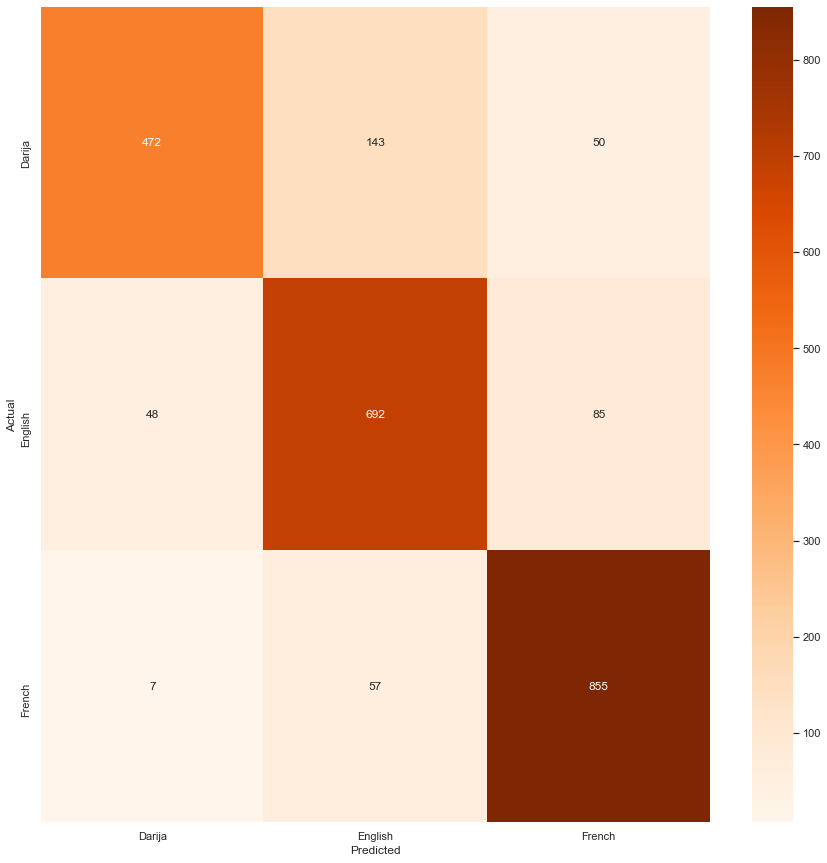

In [46]:
# Unigrams
X_unigram_train, X_unigram_test = normalizeData(X_unigram_train_raw, X_unigram_test_raw)
y_predict_nb_unigram = applyNaiveBayes(X_unigram_train, y_train, X_unigram_test,'NV_model.sav')
plot_F_Scores(y_test, y_predict_nb_unigram)
plot_Confusion_Matrix(y_test, y_predict_nb_unigram, "Oranges")
#loaded_model = pickle.load(open('NV_model.sav', 'rb'))
#result = loaded_model.predict(X,Y)
#print(result)

F1: 0.9107513491075135 (micro), 0.907809961840308 (macro), 0.9103934926199051 (weighted)


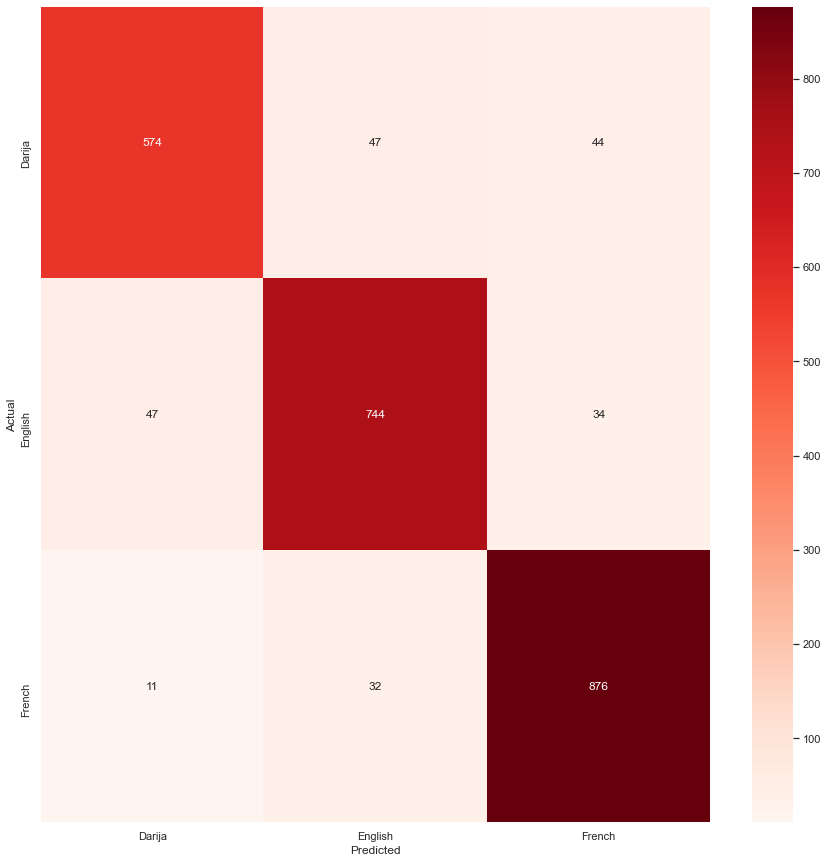

In [47]:
# Top 1%
X_top1Percent_train, X_top1Percent_test = normalizeData(X_top1Percent_train_raw, X_top1Percent_test_raw)
y_predict_nb_top1Percent = applyNaiveBayes(X_top1Percent_train, y_train, X_top1Percent_test,'file.sav')
plot_F_Scores(y_test, y_predict_nb_top1Percent)
plot_Confusion_Matrix(y_test, y_predict_nb_top1Percent, "Reds")

F1: 0.8812785388127854 (micro), 0.8776060929418827 (macro), 0.8805684091768369 (weighted)


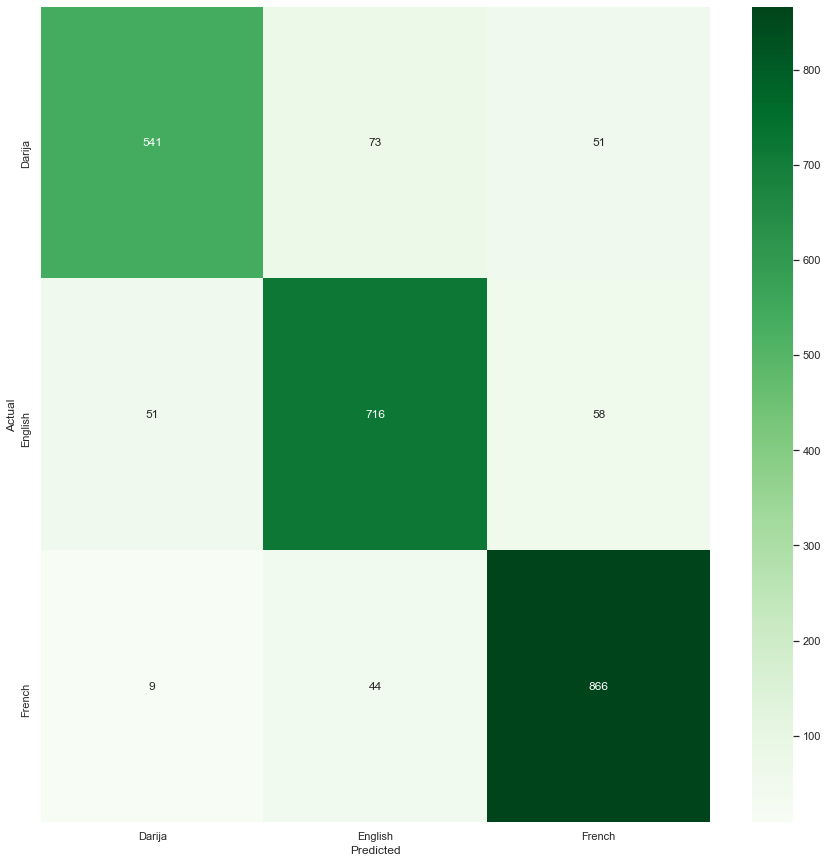

In [57]:
# Top 50
X_top50_train, X_top50_test = normalizeData(X_top50_train_raw, X_top50_test_raw)
y_predict_nb_top50 = applyNaiveBayes(X_top50_train, y_train, X_top50_test,'file.sav')
plot_F_Scores(y_test, y_predict_nb_top50)
plot_Confusion_Matrix(y_test, y_predict_nb_top50, "Greens")

F1: 0.7708592777085926 (micro), 0.7692957775211017 (macro), 0.7730615961505485 (weighted)
F1: 0.8252386882523869 (micro), 0.8203191580261732 (macro), 0.8244452387744623 (weighted)
F1: 0.8248235782482358 (micro), 0.8216400400513403 (macro), 0.8246746128493185 (weighted)
F1: 0.8401826484018263 (micro), 0.8360180488336075 (macro), 0.8395354574801732 (weighted)
F1: 0.8327106683271067 (micro), 0.828527693230193 (macro), 0.8320619806669224 (weighted)
F1: 0.8389373183893731 (micro), 0.8348977649472183 (macro), 0.8379093875170048 (weighted)
F1: 0.8401826484018263 (micro), 0.8364441917061965 (macro), 0.8393382867586964 (weighted)
F1: 0.8418430884184308 (micro), 0.83778596166832 (macro), 0.8407868191687664 (weighted)
F1: 0.8385222083852221 (micro), 0.8347032753542805 (macro), 0.8375328646328739 (weighted)
F1: 0.8397675383976754 (micro), 0.8355585107914297 (macro), 0.8386636926780875 (weighted)
F1: 0.8405977584059776 (micro), 0.8368418072930677 (macro), 0.839563259981832 (weighted)
F1: 0.83935242

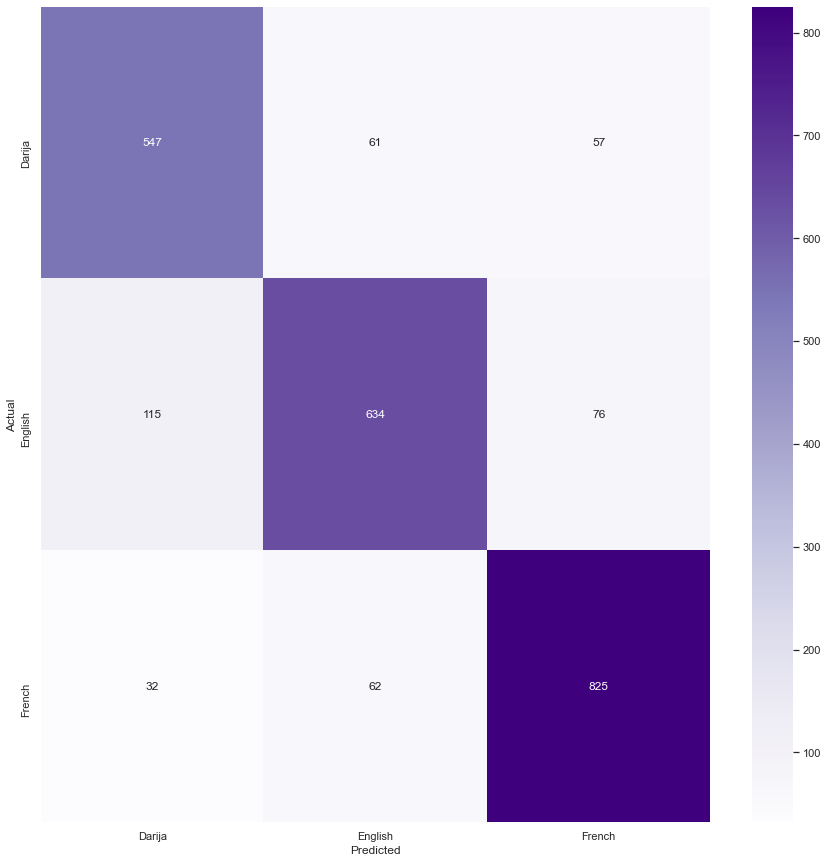

In [48]:
from sklearn.neighbors import KNeighborsClassifier

def applyNearestNeighbour(X_train, y_train, X_test,k):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(trainArray, y_train)
    y_predict = clf.predict(testArray)
    filename = 'knn_model.sav'
    #pickle.dump(clf, open(filename, 'wb'))
    return y_predict


##Unigrams
import matplotlib.pyplot as plt
F1 = []
for k in range(2, 30):
    y_predict_knn_unigram = applyNearestNeighbour(X_unigram_train, y_train, X_unigram_test,k)
    F1.append(plot_F_Scores(y_test, y_predict_knn_unigram))
#Best model : k=6
y_predict_knn_unigram = applyNearestNeighbour(X_unigram_train, y_train, X_unigram_test,6)
plot_F_Scores(y_test, y_predict_knn_unigram)
plot_Confusion_Matrix(y_test, y_predict_knn_unigram, "Purples")

F1: 0.8572021585720214 (micro), 0.85460736590757 (macro), 0.8587267900647849 (weighted)
F1: 0.892071398920714 (micro), 0.8887002585849152 (macro), 0.8915472224638602 (weighted)
F1: 0.8949771689497716 (micro), 0.8922057955310515 (macro), 0.8947510682511916 (weighted)
F1: 0.8966376089663761 (micro), 0.8933853836725717 (macro), 0.89624797852908 (weighted)
F1: 0.8982980489829805 (micro), 0.8950361682837484 (macro), 0.8979350601381328 (weighted)
F1: 0.8966376089663761 (micro), 0.8933117496936767 (macro), 0.8960931515148207 (weighted)
F1: 0.8941469489414695 (micro), 0.8907539503195205 (macro), 0.8936578295672959 (weighted)
F1: 0.8958073889580739 (micro), 0.8921702799320994 (macro), 0.8952078790636971 (weighted)
F1: 0.8908260689082607 (micro), 0.8872071895137649 (macro), 0.8901691587307575 (weighted)
F1: 0.8912411789124118 (micro), 0.8878531381034035 (macro), 0.8905301934358671 (weighted)
F1: 0.8916562889165629 (micro), 0.8880301127765632 (macro), 0.8909459657617554 (weighted)
F1: 0.889165628

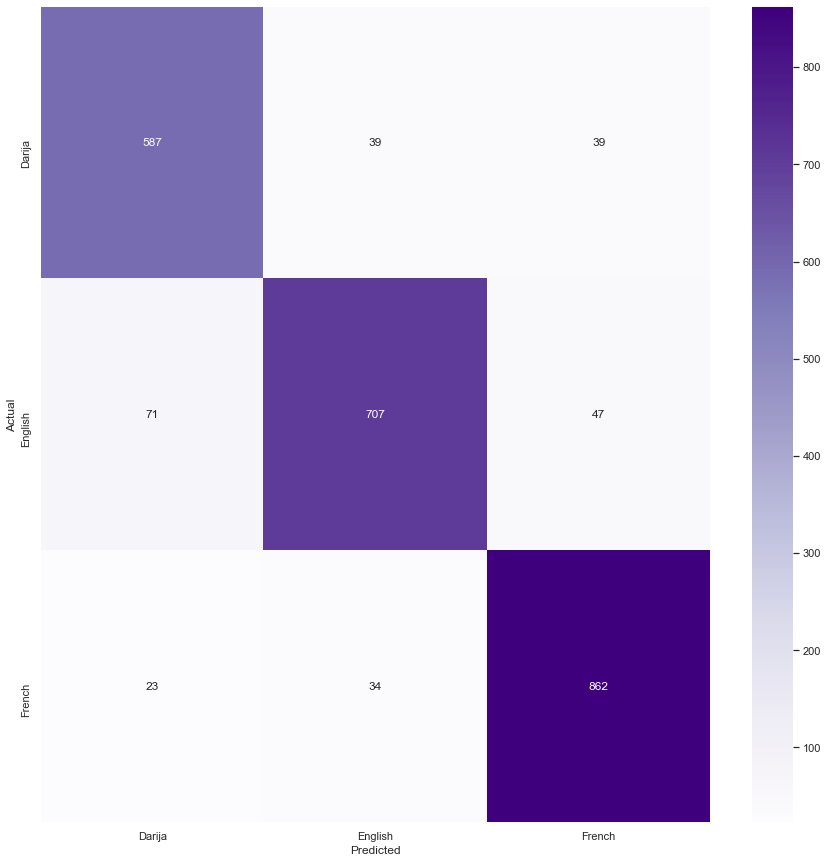

In [49]:
#Bigrams
for k in range(2, 30):
    X_top1Percent_train, X_top1Percent_test = normalizeData(X_top1Percent_train_raw, X_top1Percent_test_raw)
    y_predict_knn_top1Percent = applyNearestNeighbour(X_top1Percent_train, y_train, X_top1Percent_test,k)
    plot_F_Scores(y_test, y_predict_knn_top1Percent)
#Best model: k = 4
y_predict_knn_top1Percent = applyNearestNeighbour(X_top1Percent_train, y_train, X_top1Percent_test,4)
plot_Confusion_Matrix(y_test, y_predict_knn_top1Percent, "Purples")


In [56]:
# getRelevantColumnIndices
def getRelevantColumnIndices(allFeatures, selectedFeatures):
    relevantColumns = []
    for feature in selectedFeatures:
        relevantColumns = np.append(relevantColumns, np.where(allFeatures==feature))
    return relevantColumns.astype(int)

relevantColumnIndices = getRelevantColumnIndices(np.array(top1PercentFeatures), top50)


X_top50_train_raw = np.array(X_top1Percent_train_raw.toarray()[:,relevantColumnIndices])
X_top50_test_raw = X_top1Percent_test_raw.toarray()[:,relevantColumnIndices] 

print('train shape', X_top50_train_raw.shape)
print('test shape', X_top50_test_raw.shape)

train shape (9635, 80)
test shape (2409, 80)


F1: 0.8426733084267329 (micro), 0.8403209775537879 (macro), 0.8446166516026881 (weighted)
F1: 0.8783727687837277 (micro), 0.8753970133562669 (macro), 0.8779189106204753 (weighted)
F1: 0.8733914487339144 (micro), 0.8697626720543824 (macro), 0.8732013008562344 (weighted)
F1: 0.8870900788709007 (micro), 0.8837595089352117 (macro), 0.8865391063089391 (weighted)
F1: 0.8854296388542964 (micro), 0.8822561275013657 (macro), 0.8849913179764435 (weighted)
F1: 0.8829389788293898 (micro), 0.8795327291471176 (macro), 0.8823434051485802 (weighted)
F1: 0.8804483188044832 (micro), 0.8770379320708614 (macro), 0.8799244412708302 (weighted)
F1: 0.8783727687837277 (micro), 0.8746126845512422 (macro), 0.8776263619141605 (weighted)
F1: 0.879618098796181 (micro), 0.8759447852996782 (macro), 0.8789522506020406 (weighted)
F1: 0.8762972187629722 (micro), 0.8724968193855377 (macro), 0.8755508748793192 (weighted)
F1: 0.8742216687422167 (micro), 0.870367694961677 (macro), 0.8733624908132025 (weighted)
F1: 0.876297

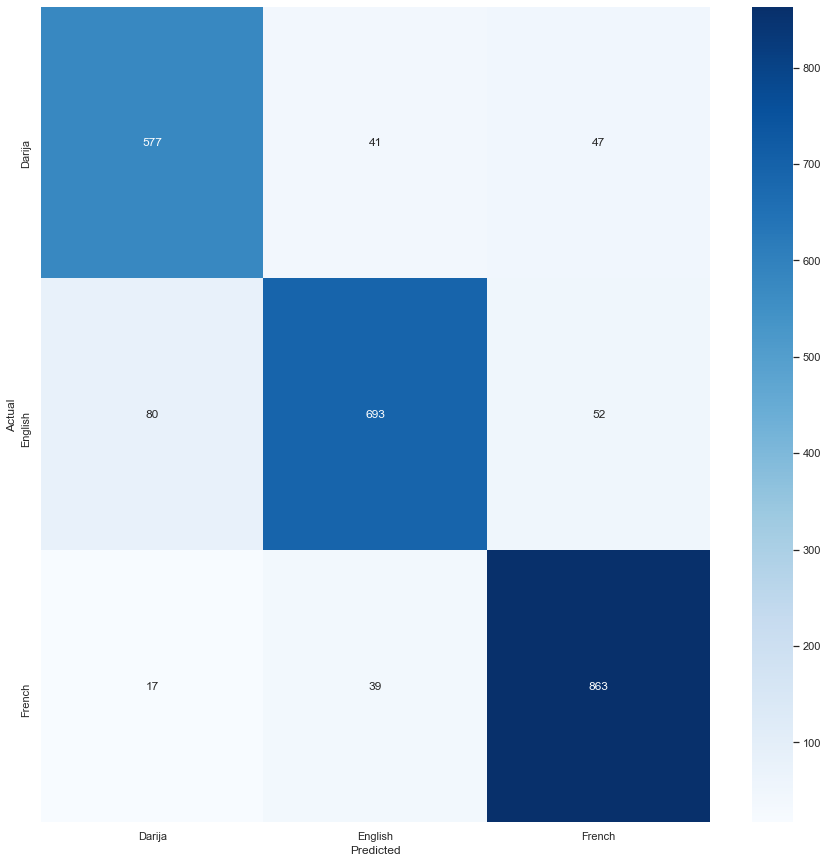

In [58]:
# Top 50
for k in range(2, 30):
    y_predict_knn_top50 = applyNearestNeighbour(X_top50_train, y_train, X_top50_test,k)
    plot_F_Scores(y_test, y_predict_knn_top50)
#Best model: k = 6
y_predict_knn_top50 = applyNearestNeighbour(X_top50_train, y_train, X_top50_test,6)
plot_Confusion_Matrix(y_test, y_predict_knn_top50, "Blues")


# Perform tests on built models

In [68]:
def uni_vect(sentence):
    test = unigramVectorizer.transform([sentence])
    var_test=toNumpyArray(test)
    return var_test
def Mixte_vect(sentence):
    test = top1PrecentMixtureVectorizer.transform([sentence])
    var_test=toNumpyArray(test)
    return var_test
def top50_vect(sentence):
    test = top1PrecentMixtureVectorizer.transform([sentence])
    var_test=toNumpyArray(test)
    new_var= np.array(test.toarray()[:,relevantColumnIndices])
    return new_var

In [69]:
def applyNaiveBayes_test(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = MultinomialNB()
    clf.fit(trainArray, y_train)
    return clf
def applyNearestNeighbour_test(X_train, y_train, X_test):
    trainArray = toNumpyArray(X_train)
    testArray = toNumpyArray(X_test)
    
    clf = KNeighborsClassifier()
    clf.fit(trainArray, y_train)
    return clf

In [70]:
#Unigrame KNN model
clf_uni1=applyNearestNeighbour_test(X_unigram_train_raw, y_train, X_unigram_test_raw)
#Mixture uni_bi KNN model
clf_mix1=applyNearestNeighbour_test(X_top1Percent_train_raw, y_train, X_top1Percent_test_raw)
#Top 50 KNN model
clf_top501 = applyNearestNeighbour_test(X_top50_train, y_train, X_top50_test)


In [71]:
#Unigrame NB model
clf_uni=applyNaiveBayes_test(X_unigram_train_raw, y_train, X_unigram_test_raw)
#Mixture uni_bi NB model
clf_mix=applyNaiveBayes_test(X_top1Percent_train_raw, y_train, X_top1Percent_test_raw)
#Top 50 NB model
clf_top50 = applyNaiveBayes_test(X_top50_train, y_train, X_top50_test)


In [79]:
#contvectorizer using unigram
var_test1=uni_vect('it maight be hiya walakin machi dima')
#contvectorizer using mixte uni_bi
var_test2=Mixte_vect('hello word')
#contvectorizer using top50
new_var=top50_vect('la vie est belle')


In [74]:
#test modele NB with unigram
clf_uni.predict(var_test1)

array(['Darija'], dtype='<U7')

In [75]:
#test modele KNN with unigram
clf_uni1.predict(var_test1)

array(['Darija'], dtype=object)

In [77]:
#test modele NB with mixte uni_bi
clf_mix.predict(var_test2)

array(['English'], dtype='<U7')

In [78]:
#test modele KNN with mixte uni_bi
clf_mix1.predict(var_test2)

array(['English'], dtype=object)

In [80]:
#test modele NB with top50
clf_top50.predict(new_var)

array(['English'], dtype='<U7')

In [81]:
#test modele KNN with top50
clf_top501.predict(new_var)

array(['English'], dtype=object)